In [61]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
#from kneed import KneeLocator
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from os import listdir
from os.path import isfile, join
import datetime as dt
import scipy.io
import glob

import matplotlib.colors as colors
import matplotlib as mpl
from netCDF4 import Dataset
import IPython.display
import cmocean
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cft
#import cosima_cookbook as cc
#from mpl_toolkits.basemap import Basemap
import math
import time
import sys


def get_var_list(list_name):
    '''
    Get a list of variables associated with a pre-defined name.
    '''
    if list_name == 'ocn':
        var_list = ['sst','sss','uocn','vocn','frzmlt']
    elif list_name == 'atmo':
        var_list = ['Tair','uatm','vatm','fswdn','flwdn','snow']
    elif list_name == 'wave':
        var_list = ['aice','wave_sig_ht','peak_period','mean_wave_dir']
    elif list_name == 'ice':
        var_list = ['aice','hi','fsdrad','iage','uvel','vvel','frazil','congel']
    elif list_name == 'JRA55':
            var_list = ['airtmp']
    elif list_name == 'static':
        var_list = ['aice','hi','hs','fsdrad','sice','iage','vlvl','vrdg']
    else:
        var_list = [list_name]

    return var_list

In [68]:
# Read in the CICE data
var_name = 'static'
variable_list = get_var_list(var_name)
num_variables = np.size(variable_list)

filename =  '/Users/noahday/Gadi/ia40/waves-10/history/iceh.2002-08-26.nc' 
mypath = '/Users/noahday/Gadi/ia40/waves-10/history/'
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#onlyfiles.sort()
os.chdir(mypath)
onlyfiles = glob.glob("*.nc")

ds = xr.open_dataset(filename)
LN = ds.TLON.values
LT = ds.TLAT.values
# Get the total number of grid points
size = 1
for dim in np.shape(LN): size *= dim
aice_data = ds['aice'][0,:,:]
mask = np.ma.masked_where(LT > 0.0, aice_data)
mask = np.ma.masked_where(aice_data < 0.15, mask)
mask = mask.mask
X_out =  np.ma.masked_array(np.empty((size,1)), mask=mask)

file_dates = []
for filecount, file in enumerate(onlyfiles):
    filename = mypath + file
    print(file)
    file_dates.append(np.datetime64(file[-13:-3]))

    ds = xr.open_dataset(filename)
    LN = ds.TLON.values
    LT = ds.TLAT.values

    aice_data = ds['aice'][0,:,:]

    #mask = np.ma.masked_where(LT > 0.0, aice_data)
    #mask = np.ma.masked_where(aice_data < 0.15, mask)
    
    #LN_masked = 

    #X_temp =  np.ma.masked_array(np.empty((size,1)), mask=mask)

    for counter, exp in enumerate(variable_list):
        data = ds[exp][0,:,:]
        #data = np.ma.masked_where(LT > 0.0, data)
        #data = np.ma.masked_where(aice_data < 0.15, data)

        data_masked = np.ma.masked_where(mask, data.values)
        #data_masked = np.ma.masked_where(aice_data < 0.15, data_masked)
        data_masked_vec = data_masked.compressed()
        size, = data_masked_vec.shape
        #print(data_masked_vec.reshape(len,1))
        #temp_vec = data.reshape(size,1)
        #temp_vec = np.ma.masked_array(temp_vec, mask=mask)
        #temp_vec = temp_vec.compressed()
        #print(temp_vec.shape)
        if counter == 0: 
            X_temp = data_masked_vec.reshape(size,1)
        else:
            #X_temp = np.ma.concatenate([X_temp, data_masked_vec.reshape(len,1)],axis=1)
            X_temp = np.concatenate([X_temp, data_masked_vec.reshape(size,1)],axis=1)
            print(X_temp.shape)
        

    #X_temp = np.ma.concatenate([X_temp, LN.reshape(size,1), LT.reshape(size,1)],axis=1)
    LN_masked = np.ma.masked_where(mask, LN)
    LN_vec = LN_masked.compressed()
    LT_masked = np.ma.masked_where(mask, LT)
    LT_vec = LT_masked.compressed()
    X_temp = np.concatenate([X_temp, LN_vec.reshape(size,1), LT_vec.reshape(size,1)],axis=1)
    #X_temp2 = np.ma.filled(X_temp, fill_value=99999)
    #X_temp2 = X_temp.compressed()
    print(filecount)
    if filecount == 0: 
       # print('Initiliased')
        X_out = X_temp
        datetime_vec =  np.tile(np.datetime64(file[-13:-3]),(size,1))
    else:
        #X_out = np.ma.concatenate([X_out, X_temp],axis=0)
        X_out = np.concatenate([X_out, X_temp],axis=0)
        datetime_vec = np.concatenate([datetime_vec, np.tile(np.datetime64(file[-13:-3]),(size,1))],axis=0)
    
    
    #row_index,wid = df_raw.shape

#X_out=np.delete(X_out,0,1)
print(X_out)

df_raw = pd.DataFrame(X_out, columns = variable_list+['longitude','latitude'])#,'date'])
df_raw['date'] = datetime_vec
df_raw = df_raw.dropna()


# Print the dataset
#print(df_raw.describe(exclude='datetime'))
df_raw.describe()
#df_raw['date']
#print(X_out.isna().sum().sum())
#print(X_out_filled.isna().sum().sum())

#X_out_filled
#idx = df_raw.iloc[:,1] < 0.1
#X_temp2.shape



#df_raw[1:5]

iceh.2002-12-30.nc
(21570, 2)
(21570, 3)
(21570, 4)
(21570, 5)
(21570, 6)
(21570, 7)
(21570, 8)
0
iceh.2002-05-01.nc
(21570, 2)
(21570, 3)
(21570, 4)
(21570, 5)
(21570, 6)
(21570, 7)
(21570, 8)
1
iceh.2002-08-26.nc
(21570, 2)
(21570, 3)
(21570, 4)
(21570, 5)
(21570, 6)
(21570, 7)
(21570, 8)
2
[[         nan          nan          nan ...          nan  80.5
  -77.87734   ]
 [         nan          nan          nan ...          nan  81.5
  -77.87734   ]
 [         nan          nan          nan ...          nan  82.5
  -77.87734   ]
 ...
 [         nan          nan          nan ...          nan  40.5
   -0.16667302]
 [         nan          nan          nan ...          nan  41.5
   -0.16667302]
 [         nan          nan          nan ...          nan  42.5
   -0.16667302]]


,aice,hi,hs,fsdrad,sice,iage,vlvl,vrdg,longitude,latitude
count,26310.000000,26310.000000,26310.000000,26310.000000,26310.000000,26310.000000,26310.000000,26310.000000,26310.000000,26310.000000
mean,0.631260,0.624363,0.088899,266.156891,6.466550,0.259229,0.311557,0.312806,199.466370,-66.972809
std,0.448666,0.638229,0.121306,333.954742,4.822205,0.244777,0.308495,0.481013,105.178352,5.496930
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,-77.629898
25%,0.000141,0.000145,0.000006,2.688404,4.228869,0.047310,0.000006,0.000054,111.500000,-71.306648
50%,0.950703,0.492974,0.032483,14.204225,5.772038,0.205182,0.269056,0.118841,206.500000,-66.695580
75%,0.999193,1.066854,0.127089,613.129837,8.569328,0.404984,0.513992,0.445109,301.500000,-63.230583
max,1.000000,4.757514,0.704927,850.476929,29.777668,2.111949,1.435104,4.738747,359.500000,-53.858738


In [63]:




X_out

mask.shape
aice_data.shape

aice_data[mask]

#import glob, os
#os.chdir(mypath)
#for file in glob.glob("*.nc"):
#    print(file)

#onlyfiles = glob.glob("*.nc")
#onlyfiles


IndexError: Unlabeled multi-dimensional array cannot be used for indexing: nj

In [ ]:
#X_temp.mask[1,:]
#temp_vec

#data
#temp_vec = data.reshape(size,1)
#temp_vec2 = np.ma.masked_array(temp_vec, mask=mask)

#temp_vec.data
data = ds[exp][0,:,:]
#print(data)
data.values[1,:]

data_masked = np.ma.masked_where(LT > 0.0, data.values)
data_masked = np.ma.masked_where(aice_data < 0.15, data_masked)
data_masked_vec = data_masked.compressed()
#print(data)
#data_masked_vec = data_masked.data.reshape((size,1))
#print(data_masked_vec.shape)
#data_masked_vec

data4[20:10000]

data4.shape
#data2.data[1,:]

In [ ]:
# Get row index and dates

mask1= (df_raw['date'] == file_dates[0])
mask2 = (df_raw['date'] == file_dates[2])

print(mask1[1:100])
print(mask2[-100:-1])
#

In [ ]:

X_train = df_raw['aice'].values
len = X_train.shape
len


Text(0.5, 1.0, 'Log-Min/Max')

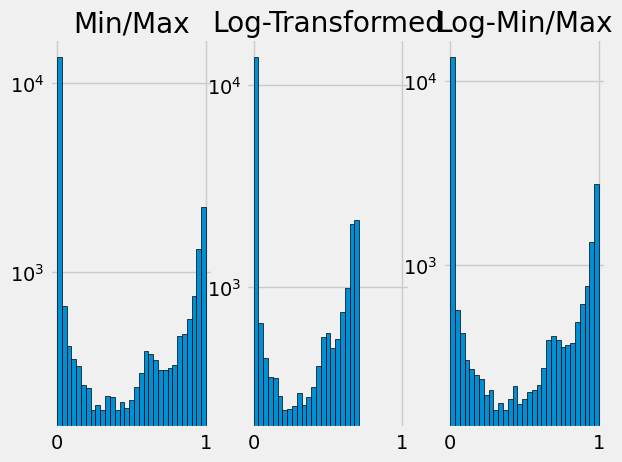

In [71]:
# Standardisation
X_train = df_raw['fsdrad'].values
len, = X_train.shape


min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train.reshape(len,1))


#create log-transformed data
X_log = np.log(X_train_minmax+1)
scaler = StandardScaler()
#scaled_features = scaler.fit_transform(X_standardized)

X_log_minmax = min_max_scaler.fit_transform(X_log.reshape(len,1))


#define grid of plots

fig, axs = plt.subplots(nrows=1, ncols=3)

#create histograms

axs[0].hist(X_train_minmax, edgecolor='black',bins=31,log=True,range=[0, 1])
axs[1].hist(X_log, edgecolor='black',bins=31,log=True,range=[0, 1])
axs[2].hist(X_log_minmax, edgecolor='black',bins=31,log=True,range=[0, 1])


#add title to each histogram
axs[0].set_title('Min/Max')
axs[1].set_title('Log-Transformed')
axs[2].set_title('Log-Min/Max')
    


In [70]:
# Standardise all the variables
row_index = len
X_train = np.zeros((row_index,1))
for counter, exp in enumerate(variable_list):
    X_temp_vec = df_raw[exp].values

    min_max_scaler = preprocessing.MinMaxScaler()
    X_temp_vec = min_max_scaler.fit_transform(X_temp_vec.reshape(row_index,1))

    #create log-transformed data
    X_temp_vec = np.log(X_temp_vec+1)
    scaler = StandardScaler()
    #scaled_features = scaler.fit_transform(X_standardized)
    X_temp_vec = min_max_scaler.fit_transform(X_temp_vec.reshape(row_index,1))
    X_train = np.concatenate([X_train, X_temp_vec],axis=1)

temp_lon = df_raw['longitude'].to_numpy()
temp_lat = df_raw['latitude'].to_numpy()
X_train = np.concatenate([X_train, temp_lon.reshape(row_index,1), temp_lat.reshape(row_index,1)],axis=1)
X_train=np.delete(X_train,0,1)

df_standard = pd.DataFrame(X_train, columns = variable_list+['longitude','latitude'])
#df_standard['date'] = df_raw['date']#np.datetime64(file_date)
df_standard['date'] = df_raw['date'].values


print(df_standard.describe())
df_standard

print(df_standard['date'])



               aice            hi            hs        fsdrad          sice  \
count  26310.000000  26310.000000  26310.000000  26310.000000  26310.000000   
mean       0.641402      0.168405      0.156524      0.333551      0.271453   
std        0.449045      0.163029      0.200516      0.403973      0.184449   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000204      0.000044      0.000013      0.004553      0.191581   
50%        0.963994      0.142244      0.064992      0.023896      0.255607   
75%        0.999418      0.291894      0.239137      0.783184      0.364883   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               iage          vlvl          vrdg     longitude      latitude  
count  26310.000000  26310.000000  26310.000000  26310.000000  26310.000000  
mean       0.159738      0.262279      0.086571    199.466363    -66.972812  
std        0.143258      0.243698      0.123350    105

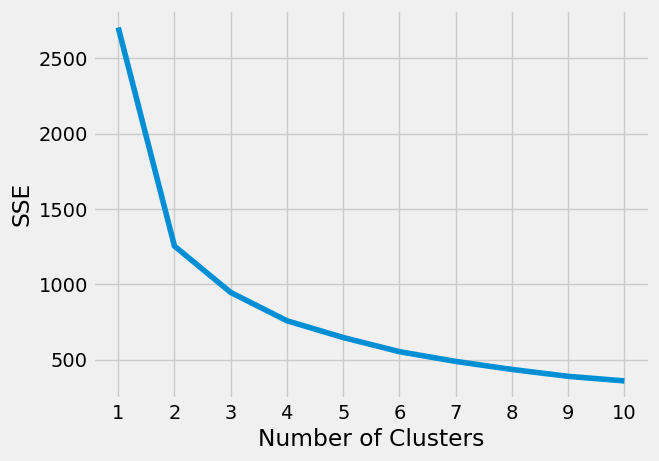

In [45]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)
#print(df_standard.iloc[:, 3] )
del X_train
X_train = df_standard.iloc[:, 0:-3] 
X_train
kmeans.fit(X_train)

# The lowest SSE value
kmeans.inertia_

# Final locations of the centroid
kmeans.cluster_centers_

# The number of iterations required to converge
kmeans.n_iter_
kmeans.labels_[:5]


kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


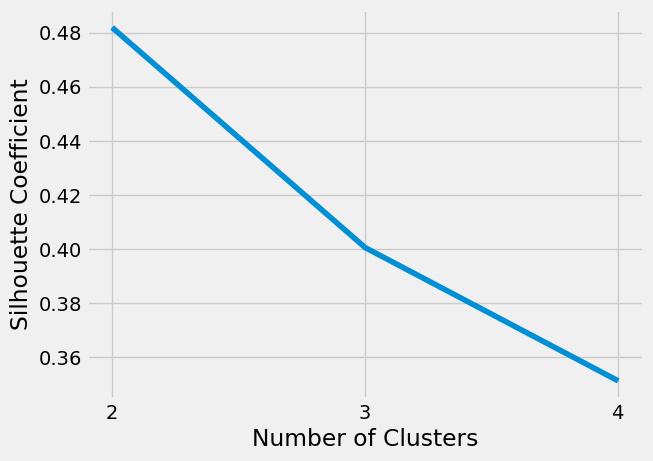

In [46]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 5), silhouette_coefficients)
plt.xticks(range(2, 5))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [74]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)
#print(df_standard.iloc[:, 3] )
del X_train
X_train = df_standard.iloc[:, 0:-4] 
print(X_train)

kmeans.fit(X_train)

df_kmeans = df_standard
df_kmeans['k'] = kmeans.labels_



#scipy.io.savemat('kmeans.mat', df_kmeans.iloc[:,:])#, dict(x=x, y=y))
df_kmeans.to_csv('kmeans.csv', index=False)

           aice        hi        hs    fsdrad      sice      iage      vlvl  \
0      0.005774  0.000498  0.000609  1.000000  0.299892  0.260531  0.001437   
1      0.001592  0.000150  0.000181  1.000000  0.278423  0.248386  0.000438   
2      0.000506  0.000115  0.000068  0.906091  0.375648  0.110906  0.000008   
3      0.000235  0.000058  0.000044  0.800952  0.341835  0.124490  0.000009   
4      0.000558  0.000158  0.000131  0.822462  0.326436  0.135947  0.000025   
...         ...       ...       ...       ...       ...       ...       ...   
26305  0.794602  0.030105  0.034738  0.004554  0.510436  0.106488  0.068331   
26306  0.766210  0.025308  0.027404  0.004553  0.552409  0.098650  0.057509   
26307  0.673161  0.017832  0.017485  0.004553  0.597830  0.095090  0.039547   
26308  0.265983  0.005954  0.004943  0.004553  0.526668  0.122641  0.008595   
26309  0.202395  0.008095  0.007104  0.004553  0.418704  0.141950  0.007353   

           vrdg  
0      0.000064  
1      0.000018

TypeError: Dimensions of C (8770, 1) are incompatible with X (8770) and/or Y (8771); see help(pcolormesh)

/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value

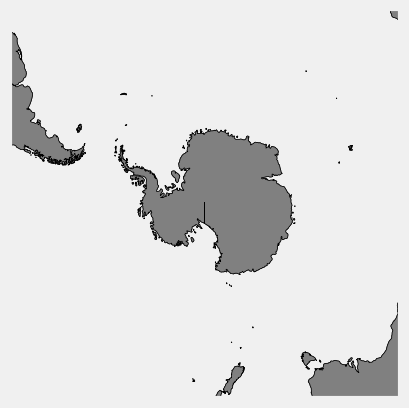

In [53]:
len_tmp, = kmeans.labels_.shape
kmean_datavec = kmeans.labels_.reshape((len_tmp,1))

coord_lims = [-180, 180, -40, -90]
ax = plt.subplot(1, 1, 0+1, projection=ccrs.SouthPolarStereo(), label='{0}'.format(counter))
#print('     ' + exp)
#ax= plot_map(ax,exp,ds,LN,LT)
#ax = plt(projection=ccrs.SouthPolarStereo())
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                            edgecolor='black', facecolor='gray', linewidth=0.5)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
ax.set_extent(coord_lims, ccrs.PlateCarree())
#gl = ax.gridlines(draw_labels=False)
sic_threshold = 0.05 
aice_data = ds['aice'][0,:,:]

plot_data = aice_data #ds[exp][0,:,:]
plot_data = np.ma.masked_where(aice_data < sic_threshold, plot_data)

cmap = cmo.deep
#cmap = cmap.reversed()

#p1 = ax.pcolormesh(LN,LT,plot_data, 
p1 = ax.pcolormesh(df_standard['longitude'],df_standard['latitude'], kmean_datavec,
                transform=ccrs.PlateCarree(),
                cmap=cmap,
               # norm=colors.LogNorm(vmin=1, vmax=1000),
                shading='auto')
cb = plt.colorbar(p1, orientation='vertical', fraction=0.046, pad=0.04)
#fontsize = 6
#cb.ax.set_ylabel( ds[exp].attrs["long_name"].partition(' of ')[0] + ' [' +  ds[exp].attrs["units"] + ']' , size=fontsize);
#cb.ax.tick_params(labelsize=fontsize) 


In [ ]:
kmeans.labels_.shape

kmean_datavec.shape